* total number of bids per user
* average number of bids per user
* number of bids made at the minimum time delta per user
* number of devices, countries, urls, auctions, ip addresses per user
* average time delta between the times each bidder places a bid (bid frequence sum/total number of bids)

## OR
* total number of bids placed (log)
* total number of auctions of participation (log)
* total number of countries from which bids were placed (log)
* total number of ips from which bids were placed (log)
* total number of urls from which bids were placed (log)
* total number of device types from which bids were placed (log)
* total number of "wins" (last bid placed in auction) (log)
* win percent
* mean bids per auction
* bidding stage (whether bids were placed earlier or later in auction)
* mean time between own bids
* mean time between own bid and the previous bid placed by a competitor
* mean number of competitors per auction of participation


In [2]:
# Packages for analysis
import pandas as pd
import numpy as np

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_bids = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/bids.csv')

In [4]:
df_bids.describe()

,bid_id,time
count,7.656334e+06,7.656334e+06
mean,3.828166e+06,9.697978e+15
std,2.210193e+06,5.250518e+13
min,0.000000e+00,9.631917e+15
25%,1.914083e+06,9.641139e+15
50%,3.828166e+06,9.700654e+15
75%,5.742250e+06,9.761744e+15
max,7.656333e+06,9.772885e+15


In [99]:
df_bids.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl
7656333,7656333,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,c9ox9,mobile,phone82,9709222052631578,jo,160.243.101.60,vasstdc27m7nks3


In [51]:
#New df to store features to
res = df_bids
res = res.drop(columns = ['auction','merchandise','device','time','country','ip','url','bid_id'])

In [52]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 1 columns):
bidder_id    object
dtypes: object(1)
memory usage: 58.4+ MB


In [8]:
#Total number of countries from which bids were placed in an auction 
b = df_bids[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b = b.rename(columns = {'country':'countries_per_bidder_per_auction'})

In [10]:
#Median number of countries from which bids were placed in an auction 
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c = c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})

In [11]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id                                  6614 non-null object
countries_per_bidder_per_auction_median    6614 non-null float64
dtypes: float64(1), object(1)
memory usage: 103.4+ KB


In [ ]:
#Total number of bids placed
z = df_bids[['bidder_id', 'auction']].groupby(['bidder_id','auction']).url.nunique().reset_index()

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382341 entries, 0 to 382340
Data columns (total 3 columns):
bidder_id    382341 non-null object
auction      382341 non-null object
url          382341 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.8+ MB


In [27]:
e.head()

,bidder_id,url_per_bidder_per_auction_mean
0,001068c415025a009fee375a12cff4fcnht8y,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.307692


In [53]:
#df1 = (pd.merge(bids_per_auction_median, auctionN,on='bidder_id'))
res = (pd.merge(c, e , on = 'bidder_id'))
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614 entries, 0 to 6613
Data columns (total 3 columns):
bidder_id                                  6614 non-null object
countries_per_bidder_per_auction_median    6614 non-null float64
url_per_bidder_per_auction_mean            6614 non-null float64
dtypes: float64(2), object(1)
memory usage: 206.7+ KB


In [54]:
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692


In [55]:
#total number of ips from which bids were placed in an auction
ip = df_bids[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction']).ip.nunique().reset_index()
#meadian number of ips per user
ip_median = ip.groupby('bidder_id').ip.median().reset_index()
ip_median = ip_median.rename(columns = {'ip':'ip_median_per_auction'})

In [56]:
ip_median.head()

,bidder_id,ip_median_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0


In [57]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, ip_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0


In [58]:
#Total number of device types from which bids were for an auction placed
device = df_bids[['bidder_id','auction','device']].groupby(['bidder_id','auction']).device.nunique().reset_index()
device_per_user_median = device.groupby('bidder_id').device.mean().reset_index()

In [59]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382341 entries, 0 to 382340
Data columns (total 3 columns):
bidder_id    382341 non-null object
auction      382341 non-null object
device       382341 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.8+ MB


In [60]:
device.head()

,bidder_id,auction,device
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1


In [61]:
device_per_user_median = device_per_user_median.rename(columns = {'device':'device_per_user_median'})
device_per_user_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id                 6614 non-null object
device_per_user_median    6614 non-null float64
dtypes: float64(1), object(1)
memory usage: 103.4+ KB


In [63]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, device_per_user_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median_x,device_per_user_median_y
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,1.538462


In [64]:
res = res.drop(columns = 'device_per_user_median_y')
res.rename(columns={'device_per_user_median_x':'device_per_user_median'}, inplace=True)
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462


In [65]:
#Number auctions per user
auctionN = df_bids[['bidder_id','auction']].groupby(['bidder_id']).auction.nunique().reset_index()

In [66]:
auctionN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 2 columns):
bidder_id    6614 non-null object
auction      6614 non-null int64
dtypes: int64(1), object(1)
memory usage: 103.4+ KB


In [67]:
auctionN['number_of_auctions_per_bidder'] = auctionN['auction']

In [68]:
auctionN = auctionN.drop(columns='auction')

In [69]:
auctionN.head()

,bidder_id,number_of_auctions_per_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3
4,00486a11dff552c4bd7696265724ff81yeo9v,13


In [70]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, auctionN, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,3
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,13


In [71]:
#Total number of bids per bidder in an auction
bidsN = df_bids[['bidder_id','auction','bid_id']].groupby(['bidder_id','auction']).bid_id.nunique().reset_index()

In [74]:
bidsN.head()

,bidder_id,auction,bid_id
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1


In [75]:
#Median number of bids per auction per bidder
bids_per_auction_median = bidsN.groupby('bidder_id').bid_id.median().reset_index()
bids_per_auction_median = bids_per_auction_median.rename(columns = {'bid_id':'bids_per_auction_median'})
bids_per_auction_median.head()

,bidder_id,bids_per_auction_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0
1,002d229ffb247009810828f648afc2ef593rb,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0


In [76]:
#Use a right join to add above df columns to the ongoing res df
res = pd.merge(res, bids_per_auction_median, on = 'bidder_id', how = 'right')
res.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1,1.0
1,002d229ffb247009810828f648afc2ef593rb,1.0,1.000000,1.0,2.000000,1,2.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1.0,1.000000,1.0,1.000000,1,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1.0,1.000000,1.0,1.000000,3,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,1.0,1.307692,1.0,1.538462,13,1.0


In [77]:
df_bidder = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/train.csv')

In [78]:
df_bidder.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [79]:
df_bidder['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [80]:
# Separate DFs for each bots and real users
df_bots = df_bidder.loc[df_bidder['outcome'] == 1.0]
df_real_users = df_bidder.loc[df_bidder['outcome'] == 0.0]

#Create a df of real users of same count as bots
df_real_users_103 = df_real_users.sample(103)

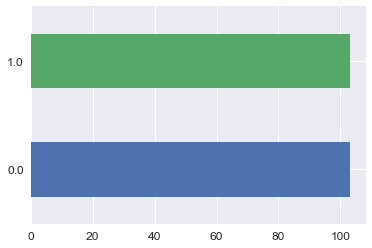

In [81]:
#Create one dataframe with equal number of two classes
frames = [df_bots, df_real_users_103]
df_classification = pd.concat(frames)

#Check for accuracy visually
df_classification.outcome.value_counts().plot('barh');

In [82]:
df_classification = df_classification.rename(columns = {'outcome':'class'})
df_classification.head()

,bidder_id,payment_account,address,class
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0


In [84]:
df_classification = df_classification.drop(columns=['payment_account', 'address'])

In [85]:
df_classification.head()

,bidder_id,class
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,1.0


In [121]:
df_modeling = pd.merge (res, df_classification, on = 'bidder_id', how = 'right')
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 8 columns):
bidder_id                                  206 non-null object
countries_per_bidder_per_auction_median    204 non-null float64
url_per_bidder_per_auction_mean            204 non-null float64
ip_median_per_auction                      204 non-null float64
device_per_user_median                     204 non-null float64
number_of_auctions_per_bidder              204 non-null float64
bids_per_auction_median                    204 non-null float64
class                                      206 non-null float64
dtypes: float64(7), object(1)
memory usage: 14.5+ KB


In [132]:
df_modeling = df_modeling[df_modeling.countries_per_bidder_per_auction_median.notnull()]
df_modeling.tail()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median,class
199,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0
200,f416aeaaafcbb66aabb77347776db008qw96o,1.0,13.626506,3.0,7.763554,664.0,3.0,0.0
201,f61d93fddb01d2d89a85a132c649aa90lj1z6,1.0,1.000000,1.0,1.000000,9.0,1.0,0.0
202,fae553f133602fba6e9e6051dfb27fefkruax,1.0,1.000000,1.0,1.869565,46.0,1.0,1.0
203,ff12cd48c7de8ffb8b2099f262ce03980dqqz,1.0,1.000000,1.0,1.000000,4.0,1.0,0.0


## Modeling results

In [137]:
#Test data file from Kaggle
test = pd.read_csv('/Users/iris/Documents/projects/mcnulty/data/test.csv')

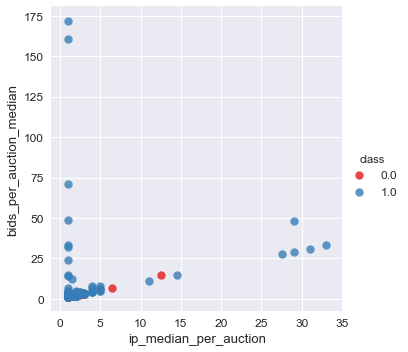

In [138]:
#Are there any features that split the data well?
sns.lmplot('ip_median_per_auction', 'bids_per_auction_median', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

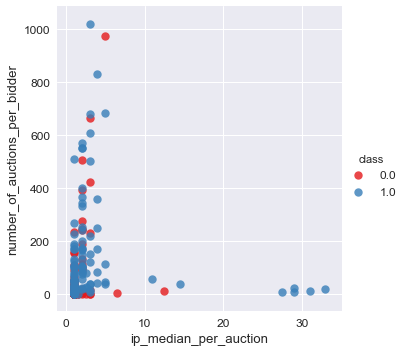

In [139]:
sns.lmplot('ip_median_per_auction', 'number_of_auctions_per_bidder', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

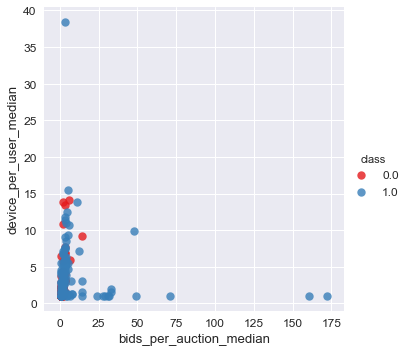

In [140]:
sns.lmplot('bids_per_auction_median', 'device_per_user_median', data=df_modeling, hue='class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [141]:
#Train test split for modeling
X = df_modeling[['countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median']]
y = df_modeling[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [142]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
# Feature names
model_features = df_modeling.columns.values.tolist()
model_features

['bidder_id',
 'countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median',
 'class']

In [152]:
# Specify inputs for the model
classifiers = df_modeling[['countries_per_bidder_per_auction_median',
 'url_per_bidder_per_auction_mean',
 'ip_median_per_auction',
 'device_per_user_median',
 'number_of_auctions_per_bidder',
 'bids_per_auction_median']].as_matrix()
class_label = np.where(df_modeling['class'] == 1)

print(class_label)

(array([  1,   4,   7,   8,   9,  12,  15,  21,  24,  26,  27,  28,  30,
        34,  38,  39,  40,  43,  44,  45,  46,  48,  49,  51,  52,  53,
        54,  55,  57,  59,  61,  69,  71,  73,  74,  75,  77,  80,  82,
        86,  90,  92,  94,  95,  96,  97,  98,  99, 102, 106, 107, 109,
       110, 111, 114, 116, 117, 119, 122, 123, 124, 126, 127, 128, 129,
       132, 136, 138, 139, 140, 145, 146, 148, 150, 151, 155, 156, 157,
       159, 161, 164, 166, 167, 170, 171, 172, 173, 174, 175, 176, 177,
       180, 181, 183, 184, 188, 189, 190, 192, 194, 198, 199, 202]),)


In [153]:
model = svm.SVC(kernel='poly', C=1.0)
model.fit(classifiers, class_label)

ValueError: bad input shape (1, 103)

In [154]:
y_pred = model_svm.predict(X_test)

In [155]:
accuracy_score(y_test,y_pred)

0.8048780487804879

In [156]:
confusion_matrix(y_test,y_pred)


array([[19,  0],
       [ 8, 14]])

In [157]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)

/Users/iris/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
y_pred2 = model_svm2.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8780487804878049

In [159]:
confusion_matrix(y_test,y_pred2)

array([[17,  2],
       [ 3, 19]])

In [160]:
#KNN for 5 neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)


print(metrics.accuracy_score(y, y_pred))

0.8333333333333334


/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [166]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8292682926829268


/Users/iris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(algorithm = 'brute')
clf = GridSearchCV(knn, param_grid = classifiers, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

clf.score(X_test,Y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [183]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [188]:
df_modeling.head()

,bidder_id,countries_per_bidder_per_auction_median,url_per_bidder_per_auction_mean,ip_median_per_auction,device_per_user_median,number_of_auctions_per_bidder,bids_per_auction_median,class
0,001068c415025a009fee375a12cff4fcnht8y,1.0,1.000000,1.0,1.000000,1.0,1.0,0.0
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,1.0,1.611765,4.0,3.082353,85.0,7.0,1.0
2,02cfc97e8fded77671e71e1951723d5fwz6a4,1.0,1.000000,1.0,1.000000,2.0,1.0,0.0
3,03a1e81cb7bcd15014489a6f752c9d5b7pvel,1.0,1.200000,1.0,1.333333,15.0,2.0,0.0
4,041d869edcadf595b90e3b5248903183pn754,1.0,1.009709,2.0,2.621359,103.0,2.0,1.0


In [200]:
from sklearn.svm import SVC

y=df_modeling.iloc[:,-1]
X=df_modeling.iloc[:, 1:5]

In [201]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [202]:
# Visualize the decision boundaries
plot_decision_regions(X, y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

TypeError: unhashable type: 'slice'

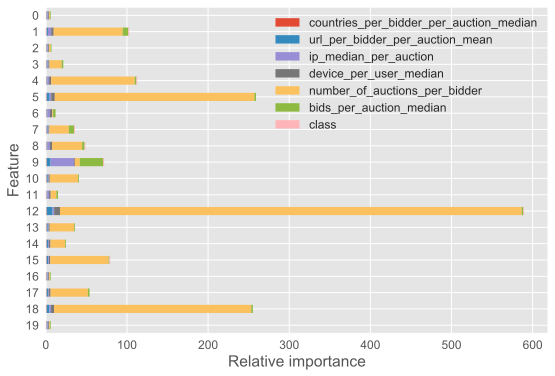

In [223]:
df_plot = df_modeling[:20]

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams['figure.figsize'] = 9, 6
ax = df_plot.plot(kind='barh', stacked = True)
ax.invert_yaxis()
plt.xlabel('Relative importance')
plt.ylabel('Feature');